In [1]:
import sys
import math
import random
from abc import ABC
from pathlib import Path
# a = Path("__file__").resolve().parent.parent
sys.path.insert(0, str(Path("__file__").parent.parent))

import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from data_aug import RandomHSV, CV2Transform, RandomBlur, RandomBrightness
from bbox_tools import letter_resize_bbox
from image_tools import letter_resize_img
from visualizer import plt_plot_img
from build_coco_dataset import COCOGenerator


In [2]:
def YOCO(img, aug_method, thresh):
    """
    Args:
        img: ndarray / (h, w, c)
        aug_method: augumentation functions
    Returns:
        img: image after YOCO
    """
    h, w, c = img.shape
    assert img.ndim == 3
    # img = img.astype(np.uint8)
    if np.random.random() < thresh:  # 垂直切分并增强后合并
        aug_img = np.concatenate((aug_method(img[:, 0:int(w//2), :]), aug_method(img[:, int(w//2):, :])), axis=1)
    else:
        aug_img = np.concatenate((aug_method(img[0:h//2, :, :]), aug_method(img[h//2:, :, :])), axis=0)
    return aug_img

In [3]:
dataset_dir = Path('/Volumes/Samsung/Dataset/COCO')
dst_size = [640, 640]
coco = COCOGenerator(dataset_dir, "val2017", False)

loading annotations into memory...
Done (t=0.53s)
creating index...
index created!


In [4]:
bboxes, imgs = [], []
for i in tqdm(range(len(coco)), total=len(coco)):
    ann = coco.load_annotations(i)
    img_id = coco.img_ids[i]
    box = ann['bboxes']
    cls_ = ann['classes']
    img_src = coco.get_img_path(i)
    assert Path(img_src).exists()
    img_arr = cv2.imread(str(img_src))[..., ::-1]
    # img_arr, info = letter_resize_img(img_arr, dst_size)
    # box = letter_resize_bbox(box, info)
    # plt_plot_img(img_arr, box, [str(i) for i in cls_], [1 for i in cls_])
    bboxes.append(box)
    imgs.append(img_arr)
    if i == 1:
        break

  0%|          | 1/5000 [00:00<01:06, 74.97it/s]


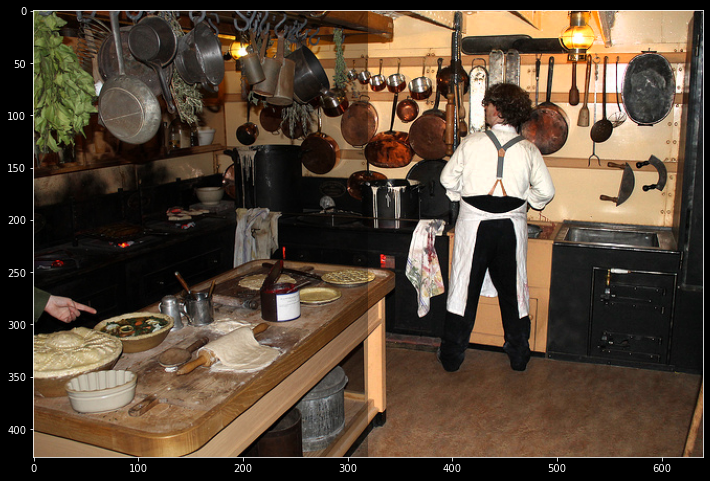

In [15]:
auged = YOCO(imgs[0], RandomBrightness, 0.3)

fig = plt.figure(figsize=[12, 9])
plt.imshow(auged)
plt.show()

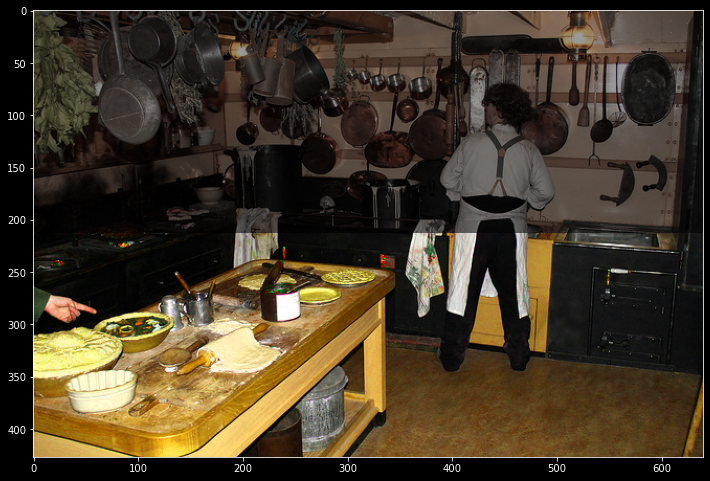

In [21]:
auged = YOCO(imgs[0], RandomHSV, 0.3)

fig = plt.figure(figsize=[12, 9])
plt.imshow(auged)
plt.show()